In [16]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### Data

In [17]:
data_clean = pd.read_csv(r'D:\spring 25\appiled stat\anika Sprint 1\data\Processed\data_clean.csv')
data_clean.head()

,Year,quarter,cur_passengers,cur_fare,ly_fare,ly_passengers,amount_change,percent_change,amount_change_pax,percent_change_pax,...,"route_Seattle, WA - Tucson, AZ","route_Seattle, WA - Washington, DC (Metropolitan Area)","route_St. Louis, MO - Tampa, FL (Metropolitan Area)","route_St. Louis, MO - Washington, DC (Metropolitan Area)","route_Syracuse, NY - Tampa, FL (Metropolitan Area)","route_Syracuse, NY - Washington, DC (Metropolitan Area)","route_Tampa, FL (Metropolitan Area) - Toledo, OH","route_Tampa, FL (Metropolitan Area) - Washington, DC (Metropolitan Area)","route_Tulsa, OK - Washington, DC (Metropolitan Area)","route_Washington, DC (Metropolitan Area) - West Palm Beach/Palm Beach, FL"
0,2024,4,34490,205.96,169.88,39340,36.08,0.2124,-4850,-0.1233,...,False,False,False,False,False,False,False,False,False,False
1,2024,4,29550,197.70,156.70,34430,41.00,0.2617,-4880,-0.1417,...,False,False,False,False,False,False,False,False,False,False
2,2024,4,24910,256.22,192.41,36680,63.81,0.3316,-11770,-0.3209,...,False,False,False,False,False,False,False,False,False,False
3,2024,4,40090,315.81,257.61,43130,58.19,0.2259,-3040,-0.0705,...,False,False,False,False,False,False,False,False,False,False
4,2024,4,82790,211.52,164.20,79590,47.32,0.2882,3200,0.0402,...,False,False,False,False,False,False,False,False,False,False


# model: predict fare

In [18]:
data_clean.head()

,Year,quarter,cur_passengers,cur_fare,ly_fare,ly_passengers,amount_change,percent_change,amount_change_pax,percent_change_pax,...,"route_Seattle, WA - Tucson, AZ","route_Seattle, WA - Washington, DC (Metropolitan Area)","route_St. Louis, MO - Tampa, FL (Metropolitan Area)","route_St. Louis, MO - Washington, DC (Metropolitan Area)","route_Syracuse, NY - Tampa, FL (Metropolitan Area)","route_Syracuse, NY - Washington, DC (Metropolitan Area)","route_Tampa, FL (Metropolitan Area) - Toledo, OH","route_Tampa, FL (Metropolitan Area) - Washington, DC (Metropolitan Area)","route_Tulsa, OK - Washington, DC (Metropolitan Area)","route_Washington, DC (Metropolitan Area) - West Palm Beach/Palm Beach, FL"
0,2024,4,34490,205.96,169.88,39340,36.08,0.2124,-4850,-0.1233,...,False,False,False,False,False,False,False,False,False,False
1,2024,4,29550,197.70,156.70,34430,41.00,0.2617,-4880,-0.1417,...,False,False,False,False,False,False,False,False,False,False
2,2024,4,24910,256.22,192.41,36680,63.81,0.3316,-11770,-0.3209,...,False,False,False,False,False,False,False,False,False,False
3,2024,4,40090,315.81,257.61,43130,58.19,0.2259,-3040,-0.0705,...,False,False,False,False,False,False,False,False,False,False
4,2024,4,82790,211.52,164.20,79590,47.32,0.2882,3200,0.0402,...,False,False,False,False,False,False,False,False,False,False


In [19]:
# removed extream outliers 1
df_trimmed = data_clean[(data_clean['cur_fare'] > data_clean['cur_fare'].quantile(0.01)) &
                (data_clean['cur_fare'] < data_clean['cur_fare'].quantile(0.99))]


In [20]:
price_pred_X = df_trimmed[['Year', 'quarter', 'ly_fare', 'ly_passengers', 'cur_passengers',
            'amount_change_pax', 'percent_change_pax']]
price_pred_y = np.log(df_trimmed['cur_fare']) # to fix skewness

In [21]:
price_pred_X_train, price_pred_X_test, price_pred_y_train, price_pred_y_test = train_test_split(price_pred_X, price_pred_y, test_size=0.2, random_state=42)

In [22]:
# Train the model
lm = LinearRegression()
lm.fit(price_pred_X_train, price_pred_y_train)
predictions = lm.predict(price_pred_X_test)

In [23]:
cdf = pd.DataFrame(lm.coef_, price_pred_X.columns, columns=['Coeff'])
print(cdf)

                           Coeff
Year               -3.210318e-03
quarter            -1.669401e-03
ly_fare             5.504235e-03
ly_passengers      -2.817011e-07
cur_passengers      2.251751e-07
amount_change_pax   5.068762e-07
percent_change_pax  6.501939e-04


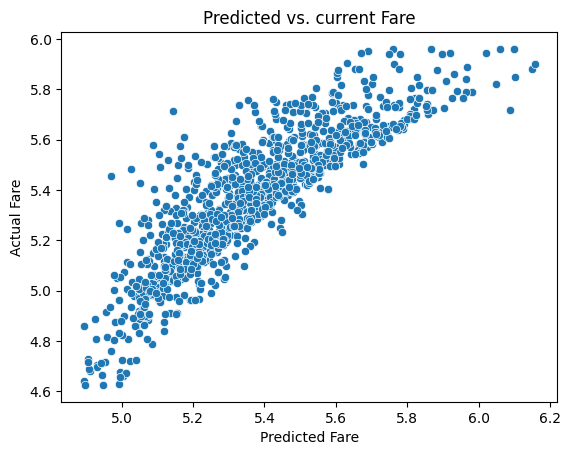

In [24]:
sns.scatterplot(x = predictions, y = price_pred_y_test)
plt.xlabel('Predicted Fare')
plt.ylabel('Actual Fare')
plt.title('Predicted vs. current Fare')
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

In [26]:
print('MAE:', mean_absolute_error(price_pred_y_test, predictions))
print('MSE:', mean_squared_error(price_pred_y_test, predictions))
print('RMSE:', math.sqrt(mean_squared_error(price_pred_y_test, predictions)))
print('R2:', r2_score(price_pred_y_test, predictions))


MAE: 0.09903470023151191
MSE: 0.016778544821163702
RMSE: 0.12953202237733996
R2: 0.752275944520258


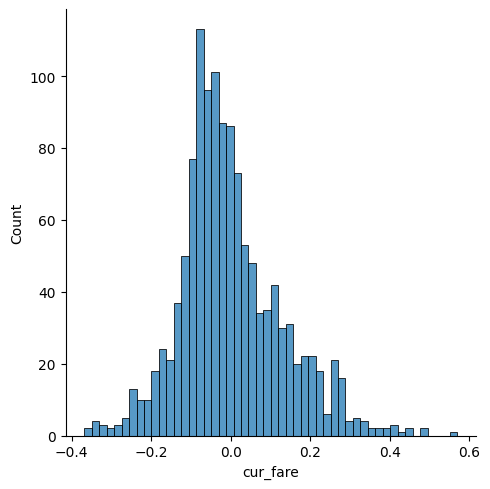

In [27]:
# residuals
price_residuals = price_pred_y_test - predictions
sns.displot(price_residuals, bins=50, kde=False)

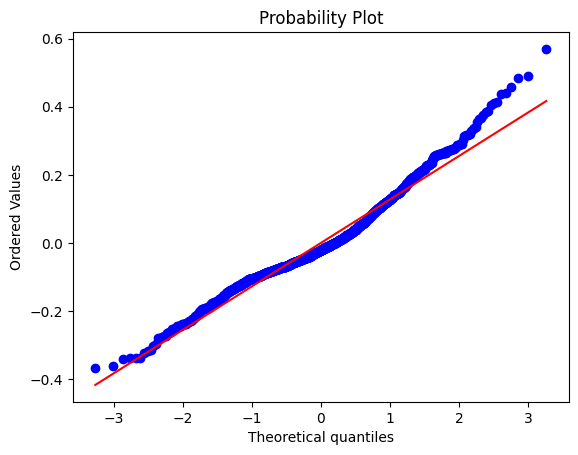

In [28]:
import scipy.stats as stats
stats.probplot(price_residuals, dist="norm", plot=plt)
plt.show()